In [1]:
import json
import numpy as np
import cv2
import matplotlib
import pandas as pd
from pandas.io.json import json_normalize
from functools import reduce

In [2]:
dataPath = 'data/'
videoFile = '1588191892844.avi'
metaFile = '1588191935174.csv'
obsFile = 'SwordObservations1588191900726.json'

In [3]:
# Get video info
cap = cv2.VideoCapture(dataPath + videoFile)
fps = cap.get(5)
frame_count = cap.get(7)
fps, frame_count

(20.0, 1239.0)

In [4]:
# Import observation data
with open(dataPath + obsFile) as f:
    d = json.load(f)

df = json_normalize(d['observations']); df

,accelMag,rotRateMag,epochMs,accel.x,accel.y,accel.z,orient.x,orient.y,orient.z,orient.w,rotRate.x,rotRate.y,rotRate.z
0,0.489985,4.418206,1588191900895,0.278004,-0.345247,-0.208814,0.825975,0.446484,0.158798,0.305287,0.878482,3.845104,1.990978
1,0.489985,4.418206,1588191901392,0.278004,-0.345247,-0.208814,0.825975,0.446484,0.158798,0.305287,0.878482,3.845104,1.990978
2,0.489985,4.418206,1588191901449,0.278004,-0.345247,-0.208814,0.825975,0.446484,0.158798,0.305287,0.878482,3.845104,1.990978
3,0.489985,4.418206,1588191901513,0.278004,-0.345247,-0.208814,0.825975,0.446484,0.158798,0.305287,0.878482,3.845104,1.990978
4,0.489985,4.418206,1588191901577,0.278004,-0.345247,-0.208814,0.825975,0.446484,0.158798,0.305287,0.878482,3.845104,1.990978
...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,0.010933,0.044717,1588191936997,-0.009949,0.002507,-0.003777,0.375337,0.197888,0.228705,0.876160,-0.038654,0.019439,0.011293
534,0.012067,0.026102,1588191937065,0.000246,-0.003760,-0.011464,0.375009,0.196994,0.229100,0.876399,-0.012142,-0.016311,0.016366
535,0.004628,0.068095,1588191937129,0.003082,-0.000350,-0.003435,0.374169,0.196788,0.229370,0.876733,-0.065262,-0.009629,-0.016885
536,0.014085,0.012460,1588191937199,0.000194,0.000081,-0.014083,0.373608,0.196361,0.229409,0.877058,-0.004666,0.000845,0.011522


In [5]:
# Import video metadata
df_meta = pd.read_csv(dataPath + metaFile, index_col=0); df_meta

,Time
0,1.588192e+12
1,1.588192e+12
2,1.588192e+12
3,1.588192e+12
4,1.588192e+12
...,...
1234,1.588192e+12
1235,1.588192e+12
1236,1.588192e+12
1237,1.588192e+12


In [6]:
# Transform features

def assoc_frame(df):
    frames = df.apply(lambda row: df_meta.iloc[(df_meta['Time']-row['epochMs']).abs().argsort()[:1]].index[0], axis=1)
    df['frame'] = frames
    return df

fns = [assoc_frame]
df_trans = reduce(lambda res, fn: fn(res), fns, df); df_trans

,accelMag,rotRateMag,epochMs,accel.x,accel.y,accel.z,orient.x,orient.y,orient.z,orient.w,rotRate.x,rotRate.y,rotRate.z,frame
0,0.489985,4.418206,1588191900895,0.278004,-0.345247,-0.208814,0.825975,0.446484,0.158798,0.305287,0.878482,3.845104,1.990978,222
1,0.489985,4.418206,1588191901392,0.278004,-0.345247,-0.208814,0.825975,0.446484,0.158798,0.305287,0.878482,3.845104,1.990978,237
2,0.489985,4.418206,1588191901449,0.278004,-0.345247,-0.208814,0.825975,0.446484,0.158798,0.305287,0.878482,3.845104,1.990978,239
3,0.489985,4.418206,1588191901513,0.278004,-0.345247,-0.208814,0.825975,0.446484,0.158798,0.305287,0.878482,3.845104,1.990978,240
4,0.489985,4.418206,1588191901577,0.278004,-0.345247,-0.208814,0.825975,0.446484,0.158798,0.305287,0.878482,3.845104,1.990978,242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,0.010933,0.044717,1588191936997,-0.009949,0.002507,-0.003777,0.375337,0.197888,0.228705,0.876160,-0.038654,0.019439,0.011293,1238
534,0.012067,0.026102,1588191937065,0.000246,-0.003760,-0.011464,0.375009,0.196994,0.229100,0.876399,-0.012142,-0.016311,0.016366,1238
535,0.004628,0.068095,1588191937129,0.003082,-0.000350,-0.003435,0.374169,0.196788,0.229370,0.876733,-0.065262,-0.009629,-0.016885,1238
536,0.014085,0.012460,1588191937199,0.000194,0.000081,-0.014083,0.373608,0.196361,0.229409,0.877058,-0.004666,0.000845,0.011522,1238


<IPython.core.display.Javascript object>


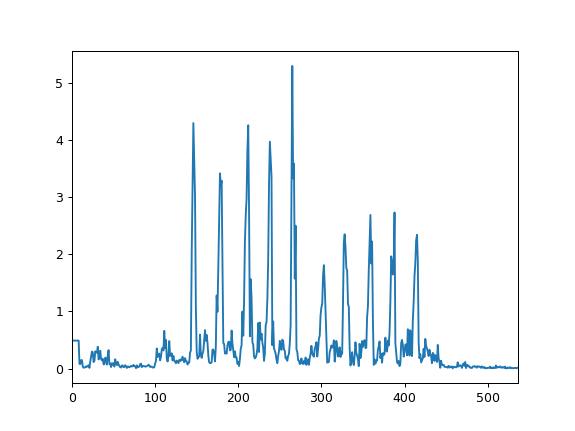

In [17]:
%matplotlib notebook
ax = df_trans['accelMag'].plot()
fig = ax.figure

def onclick(event):
    df_row = df_trans.iloc[[int(event.xdata)]]
    cap.set(1, df_row['frame'])
    ret, frame = cap.read()
    cv2.imshow('Frame',frame)
    cv2.waitKey()
    cv2.destroyAllWindows()

cid = fig.canvas.mpl_connect('button_press_event', onclick)